# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

<div class="alert alert-block alert-info">
The number of traffic accidents and the casuialties resulted from these accidents are enourmos in saudi arabia. applying new rules and regulations and puting strict penalties on the traffic violations has decreased the number of accidents between 2016 and 2017. however, the number of traffic accidents in the kingdom still very high. data for the traffic accidents for each administrative area in the kingdom was gathered for 2016 and 2017. also, data of the number of driving licenses issued were gathered for each province for many years. we hope that by analysing this data we can extract insights and help reducing the number of traffic accidents in the kingdom.<br><br>
The number of traffic Accidents in any place is goverened by three root drivers: 
<br>1. The number of cars on the road.
2. The Driver behaviour.
3. Road structure and traffic engineering.
<br>
Any increase or decrease in the number accidents will be drived by one or more of these drivers. for example, imposing traffic violations tickets aims to regulate the driver behaviour and so on.

## Executive Summary
 write an executive summary that summarizes the problem and your key findings.

<div class="alert alert-block alert-warning">
This project aims to fined trends and insights that will help us understand the accidents and help minimizing it.
For the years from 1993 to 2017 we have the data of the number of driving licenses issued for each administrative area. On the other dataset, we have data of the accidents, the dead and injured casualities from these accidents for 2016 and 2017 for each administrative area.
<br><br>
It was found that there is a strong positive correlation between the number of driving licenses and the number of traffic accidents. This means that as the number of driving licenses increase there is statically high relation that the number of accidents will also increase. As the the number of accidents increase there is also statically strong relation that the number of dead and injured people will increase and this is really an intuitive conclusion.
<br><br>
The three regions that have the highest mean driving licenses are Makkah, Riyadh and Eastern Province respectivaly. 
The three regions that have the highest mean traffic accidents are Makkah, Riyadh and Eastern Province respectivaly.
we see that the same patteren emerges for both the number of driving licenses and the number of traffic accidents which further prove the high correlation between the two features.
<br><br>
The analysis shows that the number of traffic accidents in the kingdom is decreasing with time mainly due to the regulations and new violations system.
<br><br>
It is highly recommended to take other approaches to solve the problem of traffic accidents. for example, In addition to the traffic rules that is used to regulate the driver behaviour, we might try reducing the number of cars on the roads by providing public transportation options i.e. buses and subways.


Please read me Article on Medium.<br>
https://medium.com/@bilal1yussef/traffic-accidents-analyses-in-saudi-arabia-46edbe93a08

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# the traffic accidents datasets is named (tra). the driving licenses dataset is named (lic)
tra = pd.read_csv('~\Google Drive\DSI\projects\project-1\data\saudi-arabia-traffic-accidents-2008.csv', delimiter=';')
lic = pd.read_csv('~\Google Drive\DSI\projects\project-1\data\saudi-arabia-driving-licenses-2004-2008.csv', delimiter=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
tra.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [4]:
lic.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

<div class="alert alert-block alert-success">
Answer:<br>
#The Traffic Accidents File:<br>
unnamed: 0 and unnamed 0.1: I believe that they are just replicas of the index and they should be removed.<br>
year: the year at which data were collected.<br>
Region: the adminstrative area or province where the number of traffic accidents is reported.<br>
Indicator: the description of the value column. whether the number in the value column indicate the number of **accidents**, the number of dead casualties or the number of injured casualties.<br>
Value: a column containing integer numbers that expresses the number of the indicator column.<br>
geo_point_2d: the xy geografical coordinates of the province.
<br><br>
#The driving-licenses File:<br>
unnamed: I believe that they are just replicas of the index and they should be removed.<br>
Year: the year at which data were collected.<br>
Administritive Area: the adminstrative area or province where the number of driving licenses is reported.<br>
Driving Liceses: the number of driving licenses issused at the given year at the given province.<br>
geo_point_2d: the xy geografical coordinates of the province.

In [5]:
# deleting the unnecessory columns 
del tra['Unnamed: 0']
del tra['Unnamed: 0.1']
del lic['Unnamed: 0']

#### 4a. How complete is the data?

Investigate missing values etc.

In [6]:
tra.isnull().sum()

Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

<div class="alert alert-block alert-info">
There are 6 missing values in the geo_point_2d column in the Traffic_Accidents dataset

In [7]:
lic.isnull().sum()

Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

<div class="alert alert-block alert-info">
There are 25 missing values in the geo_point_2d column in the Driving_Licenses dataset

In [8]:
tra.Year.nunique(),tra.Year.unique()

(2, array(['(2016)', '(2017)'], dtype=object))

In [9]:
lic.Year.nunique(),sorted(lic.Year.unique())

(25,
 ['(1993)',
  '(1994)',
  '(1995)',
  '(1996)',
  '(1997)',
  '(1998)',
  '(1999)',
  '(2000)',
  '(2001)',
  '(2002)',
  '(2003)',
  '(2004)',
  '(2005)',
  '(2006)',
  '(2007)',
  '(2008)',
  '(2009)',
  '(2010)',
  '(2011)',
  '(2012)',
  '(2013)',
  '(2014)',
  '(2015)',
  '(2016)',
  '(2017)'])

<div class="alert alert-block alert-warning">
The driving licenses is from 1993 - 2017 not to 2016 as mentioned in the Datasets Description section above.

In [10]:
lic.head(60)

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [11]:
tra.head(60)

,Year,Region,Indicator,Value,geo_point_2d
0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


<div class="alert alert-block alert-info">
The missing values in the geo_point_2d column in both datasets are because we have a row containing the total of all licenses issued in Saudi arabia and, the total of all accidints, injured and dead datas in saudi arabia. Thus, we don't have a geo_point_2d for it since it is for all regions of Saudi Arabia. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [12]:
tra.max()

Year                              (2017)
Region                             Total
Indicator    No. of Casualties - Injured
Value                             99925n
dtype: object

In [13]:
lic.max()

Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object

In [14]:
tra.min()

Year                   (2016)
Region               Al-Baaha
Indicator    No. of Accidents
Value                   1007n
dtype: object

In [15]:
lic.min()

Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: object(5)
memory usage: 3.4+ KB


In [17]:
lic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: object(4)
memory usage: 11.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

<div class="alert alert-block alert-success">
Answer: <br>All the columns are of object type, although the year, driving licenses, value and geo_point_2d columns should be of numeric type.

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [18]:
def obj_to_num(df):
    cols = df.columns
    for col in cols:
        try:
            df[col] = df[col].apply(lambda x: eval(x))
        except:
            df[col] = df[col].apply(lambda x:x)

In [19]:
obj_to_num(tra)
obj_to_num(lic)

In [20]:
tra.info()
#checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
Year            84 non-null int64
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(1), object(4)
memory usage: 3.4+ KB


In [21]:
lic.info()
#checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
Year                   350 non-null int64
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(3)
memory usage: 11.0+ KB


- Make new columns `x` and `y` using `geo_point_2d`

In [22]:
geo_split = tra.geo_point_2d.str.split(',', expand=True)
tra['x'] = pd.to_numeric(geo_split[0])
tra['y'] = pd.to_numeric(geo_split[1])

In [23]:
tra.head()

,Year,Region,Indicator,Value,geo_point_2d,x,y
0,2016,Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334",21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439",23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394",27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508",27.400846,41.440696
4,2016,Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508",27.400846,41.440696


In [24]:
geo_split = lic.geo_point_2d.str.split(',', expand=True)
lic['x'] = pd.to_numeric(geo_split[0])
lic['y'] = pd.to_numeric(geo_split[1])

In [25]:
lic.head()

,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,2012,Makkah,143954n,"21.628962766, 41.2636898334",21.628963,41.26369
1,1994,Makkah,75349n,"21.628962766, 41.2636898334",21.628963,41.26369
2,1998,Makkah,86082n,"21.628962766, 41.2636898334",21.628963,41.26369
3,2004,Makkah,86636n,"21.628962766, 41.2636898334",21.628963,41.26369
4,2005,Makkah,65099n,"21.628962766, 41.2636898334",21.628963,41.26369


- Fix any individual values preventing other columns from being the appropriate type.

In [26]:
tra.Value = tra.Value.str.replace("n","")

In [27]:
lic['Driving Liceses'] = lic['Driving Liceses'].str.replace("n","")

In [28]:
tra.head()

,Year,Region,Indicator,Value,geo_point_2d,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400846,41.440696


In [29]:
lic.head()

,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.26369
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628963,41.26369
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628963,41.26369
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628963,41.26369
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628963,41.26369


In [30]:
obj_to_num(tra)
obj_to_num(lic)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [31]:
tra.info()
# notice that the Vlaue column is still an object !!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Year            84 non-null int64
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null int64
geo_point_2d    78 non-null object
x               78 non-null float64
y               78 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.7+ KB


In [32]:
lic.info()
# notice that the Driving Licenses column is still an object !!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
Year                   350 non-null int64
Administritive Area    350 non-null object
Driving Liceses        350 non-null int64
geo_point_2d           325 non-null object
x                      325 non-null float64
y                      325 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 16.5+ KB


In [33]:
obj_to_num(tra)
obj_to_num(lic)

- Display the data types again to confirm they are correct.

In [34]:
tra.info()
# now all the types are correct!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Year            84 non-null int64
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null int64
geo_point_2d    78 non-null object
x               78 non-null float64
y               78 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.7+ KB


In [35]:
lic.info()
# now all the types are correct!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
Year                   350 non-null int64
Administritive Area    350 non-null object
Driving Liceses        350 non-null int64
geo_point_2d           325 non-null object
x                      325 non-null float64
y                      325 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 16.5+ KB


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [36]:
tra.columns = ['year','province','type_of_casualties','number_of_Casualties',
               'geo_coordinates','x_coordinate','y_coordinate']

In [37]:
tra.head(10)

,year,province,type_of_casualties,number_of_Casualties,geo_coordinates,x_coordinate,y_coordinate
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400846,41.440696
5,2016,Northern Boarder,No. of Casualties - Dead,193,"30.197074783, 41.8171186952",30.197075,41.817119
6,2017,Jazan,No. of Accidents,22161,"17.2072313962, 42.6525807422",17.207231,42.652581
7,2017,Al-Jouf,No. of Accidents,10469,"29.9677445762, 39.5570371172",29.967745,39.557037
8,2017,Total,No. of Casualties - Dead,7489,NaN,NaN,NaN
9,2016,Northern Boarder,No. of Casualties - Injured,631,"30.197074783, 41.8171186952",30.197075,41.817119


In [38]:
lic.columns = ['year','province','num_of_licenses_issued','geo_coordinates',
               'x_coordinate','y_coordinate']

In [39]:
lic.head()

,year,province,num_of_licenses_issued,geo_coordinates,x_coordinate,y_coordinate
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.26369
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628963,41.26369
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628963,41.26369
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628963,41.26369
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628963,41.26369


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|Driving_Licenses/Traffic_Accidents|This is an example| 


In [40]:
tra.columns

Index(['year', 'province', 'type_of_casualties', 'number_of_Casualties',
       'geo_coordinates', 'x_coordinate', 'y_coordinate'],
      dtype='object')

## Traffic Accidentes DataFrame (tra) dictionary
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year_tra**|*integer*|Traffic_Accidents|this column contains the year at which the accidents data were collected for the traffic accidents dataset (tra).|
|**province_tra**|*object/string*|Traffic_Accidents|this column contains the province(Administrative area) at which the accidents data were collected for the traffic accidents dataset (tra).|
|**type_of_casualties**|*object/string*|Traffic_Accidents|this column contains the type of casualties for which the number is reported. we have 3 types of causualties: daed, injured or any type  of accidents were a human casualties may or may not have happened.|
|**number_of_Casualties**|*integer*|Traffic_Accidents|this column contains the number of the casualties of involved in the specified year for the specified province.|
|**geo_coordinates_tra**|*object (set of  two floats)*|Traffic_Accidents|this column contains the geografical coordinates of the privince it consist of two point coordinate, x and y for the (tra) dataset.|
|**x_coordinate_tra**|*float*|Traffic_Accidents|the x coordinate of the province geo coordinate set. splitted from the geo_coordinates_tra column|
|**y_coordinate_tra**|*float*|Traffic_Accidents|the y coordinate of the province geo coordinate set. splitted from the geo_coordinates_tra column|

In [41]:
lic.columns

Index(['year', 'province', 'num_of_licenses_issued', 'geo_coordinates',
       'x_coordinate', 'y_coordinate'],
      dtype='object')

## Driving Licenses DataFrame (lic) dictionary
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year_lic**|*integer*|Driving_Licenses|this column contains the year at which the licenses data were collected for the driving license dataset (lic).|
|**province_lic**|*object/string*|Driving_Licenses|the province(Administrative area) at which the driving licenses data were collected for the driving licenses dataset (lic).|
|**num_of_licenses_issued**|*integer*|Driving_Licenses|the number of the driving licenses issued in the specified year for the specified province.|
|**geo_coordinates_lic**|*object (set of  two floats)*|Driving_Licenses|this column contains the geografical coordinates of the privince it consist of two point coordinate, x and y for the (lic) dataset.|
|**x_coordinate_lic**|*float*|Driving_Licenses|the x coordinate of the province geo coordinate set. splitted from the geo_coordinates_lic column|
|**y_coordinate_lic**|*float*|Driving_Licenses|the y coordinate of the province geo coordinate set. splitted from the geo_coordinates_lic column|

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [42]:
tra.province.unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Total', 'Al-Baaha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

In [43]:
lic.province.unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Total', 'Riyadh'], dtype=object)

<div class="alert alert-block alert-success">
    Answer  0 :  The Total rows (in both datasets) are not  associated with regions.

<div class="alert alert-block alert-success">
Answer  1 : the code below will confirm that  the numbers of all regions add up to total.

In [44]:
tra_no_total = tra[tra.province!='Total']
# Taking a subset of tra where the "Total" rows are not included.

In [45]:
tra_no_total.info()
# making sure that "Total" rows are excluded.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 83
Data columns (total 7 columns):
year                    78 non-null int64
province                78 non-null object
type_of_casualties      78 non-null object
number_of_Casualties    78 non-null int64
geo_coordinates         78 non-null object
x_coordinate            78 non-null float64
y_coordinate            78 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.9+ KB


In [46]:
tra_no_total.groupby(by=['year','type_of_casualties'], as_index=False).sum()
# summing the number of casualties in each year for each casualty type for all the regions

,year,type_of_casualties,number_of_Casualties,x_coordinate,y_coordinate
0,2016,No. of Accidents,533380,309.535811,553.836254
1,2016,No. of Casualties - Dead,9031,309.535811,553.836254
2,2016,No. of Casualties - Injured,38120,309.535811,553.836254
3,2017,No. of Accidents,460488,309.535811,553.836254
4,2017,No. of Casualties - Dead,7489,309.535811,553.836254
5,2017,No. of Casualties - Injured,33199,309.535811,553.836254


In [47]:
tra_total = tra[tra.province == 'Total']
tra_total.sort_values(by=['year','type_of_casualties'])
# Taking a subset of tra where only the "Total" rows are included to confirm that the numbers of all regions add up to total.

,year,province,type_of_casualties,number_of_Casualties,geo_coordinates,x_coordinate,y_coordinate
29,2016,Total,No. of Accidents,533380,NaN,NaN,NaN
77,2016,Total,No. of Casualties - Dead,9031,NaN,NaN,NaN
30,2016,Total,No. of Casualties - Injured,38120,NaN,NaN,NaN
68,2017,Total,No. of Accidents,460488,NaN,NaN,NaN
8,2017,Total,No. of Casualties - Dead,7489,NaN,NaN,NaN
69,2017,Total,No. of Casualties - Injured,33199,NaN,NaN,NaN


<div class="alert alert-block alert-success">
Answer  2: since we have confirmed that the total rows add up to the total of all the regions, we can delet the rows with total since we can reproduce it at any time.

In [48]:
tra = tra[tra.province!='Total']
tra.info()
# deleting the "Total" rows and confirming that by info().

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 83
Data columns (total 7 columns):
year                    78 non-null int64
province                78 non-null object
type_of_casualties      78 non-null object
number_of_Casualties    78 non-null int64
geo_coordinates         78 non-null object
x_coordinate            78 non-null float64
y_coordinate            78 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.9+ KB


In [49]:
lic = lic[lic.province!='Total']
lic.info()
# deleting the "Total" rows and confirming that by info().

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 349
Data columns (total 6 columns):
year                      325 non-null int64
province                  325 non-null object
num_of_licenses_issued    325 non-null int64
geo_coordinates           325 non-null object
x_coordinate              325 non-null float64
y_coordinate              325 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 17.8+ KB


#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

<div class="alert alert-block alert-success">
Answer:<br>
The Traffic Accidents dataset can be considered as  **long**. the type_of_casualties and number_of_Casualties   columns make it to be long. we can 'widen' it by making the indicators as columns.<br>On the other hand, the Driving_licenses dataset is already wide.

In [50]:
tra.type_of_casualties.unique()
# making sure what unique values in the type_of_casualties column.

array(['No. of Casualties - Injured', 'No. of Casualties - Dead',
       'No. of Accidents'], dtype=object)

In [51]:
tra.type_of_casualties = tra.type_of_casualties.map({'No. of Casualties - Injured':'num_of_injured','No. of Casualties - Dead':'num_of_dead','No. of Accidents':'num_of_accidents'})
# changing the names in the type_of_casualties column as a preperation for converting them into a columns(widening the tra DataFrame).

In [52]:
tra = pd.pivot_table(tra, values = 'number_of_Casualties', index=['year','province','geo_coordinates','x_coordinate','y_coordinate'], columns = 'type_of_casualties').reset_index()
tra.head()
# creating a pivot table where the accidents, dead, injured are columns.

type_of_casualties,year,province,geo_coordinates,x_coordinate,y_coordinate,num_of_accidents,num_of_dead,num_of_injured
0,2016,Al-Baaha,"20.1484058503, 41.4665484892",20.148406,41.466548,3618,185,1227
1,2016,Al-Jouf,"29.9677445762, 39.5570371172",29.967745,39.557037,10212,245,920
2,2016,Asir,"19.1387847401, 42.941470036",19.138785,42.941470,32684,983,2541
3,2016,Eastern Region,"23.2883307307, 50.1478302439",23.288331,50.147830,101619,1113,4893
4,2016,Hail,"27.400845724, 41.4406960508",27.400846,41.440696,10199,299,932


In [53]:
tra = tra[['year','province','num_of_accidents','num_of_dead','num_of_injured','geo_coordinates','x_coordinate','y_coordinate']]
# Re-arranging the columns in the pivoted dataframe.

In [54]:
tra.head()

type_of_casualties,year,province,num_of_accidents,num_of_dead,num_of_injured,geo_coordinates,x_coordinate,y_coordinate
0,2016,Al-Baaha,3618,185,1227,"20.1484058503, 41.4665484892",20.148406,41.466548
1,2016,Al-Jouf,10212,245,920,"29.9677445762, 39.5570371172",29.967745,39.557037
2,2016,Asir,32684,983,2541,"19.1387847401, 42.941470036",19.138785,42.941470
3,2016,Eastern Region,101619,1113,4893,"23.2883307307, 50.1478302439",23.288331,50.147830
4,2016,Hail,10199,299,932,"27.400845724, 41.4406960508",27.400846,41.440696


In [55]:
sorted(tra.province.unique())
# confirming what region names should be changed to be identical in both datasets before merging.

['Al-Baaha',
 'Al-Jouf',
 'Asir',
 'Eastern Region',
 'Hail',
 'Jazan',
 'Madinah',
 'Makkah',
 'Najran',
 'Northern Boarder',
 'Qassim',
 'Riyadh',
 'Tabouk']

In [56]:
sorted(lic.province.unique())
# confirming what region names should be changed to be identical in both datasets before merging.

['Al-Baha',
 'Al-Jouf',
 'Al-Qaseem',
 'Assir',
 'Eastern',
 'Hail',
 'Jazan',
 'Madinah',
 'Makkah',
 'Najran',
 'Northern Boarder',
 'Riyadh',
 'Tabouk']

In [57]:
lic.province = lic.province.map({'Makkah':'Makkah', 'Madinah':'Madinah', 'Al-Qaseem':'Qassim', 'Eastern':'Eastern', 'Assir':'Asir', 'Tabouk':'Tabouk',
       'Hail':'Hail', 'Northern Boarder':'Northern Boarder', 'Jazan':'Jazan', 'Najran':'Najran', 'Al-Baha':'Al-Baha',
       'Al-Jouf':'Al-Jouf', 'Total':'Total', 'Riyadh':'Riyadh'})
tra.province = tra.province.map({'Makkah':'Makkah', 'Madinah':'Madinah', 'Qassim':'Qassim', 'Eastern Region':'Eastern', 'Asir':'Asir', 'Tabouk':'Tabouk',
       'Hail':'Hail', 'Northern Boarder':'Northern Boarder', 'Jazan':'Jazan', 'Najran':'Najran', 'Al-Baaha':'Al-Baha',
       'Al-Jouf':'Al-Jouf', 'Total':'Total', 'Riyadh':'Riyadh'})
lic.province.unique()
# fixing the province names for both datasets

array(['Makkah', 'Madinah', 'Qassim', 'Eastern', 'Asir', 'Tabouk', 'Hail',
       'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha', 'Al-Jouf',
       'Riyadh'], dtype=object)

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

<div class="alert alert-block alert-success">
Answer: the wide format is best for both dataframes. Since tra is long the code for (widening) it is above.

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

<div class="alert alert-block alert-success">
Answer: the outer type joint is the best type in preserving the most data. Because it takes all the rows in both datafarames.

In [58]:
pd.merge(lic, tra, how='outer', on=['year','province','geo_coordinates','x_coordinate','y_coordinate']).sort_values(['year','province'])
# merging the two dataframes and displaying them with sorted order to ensure the result before assighning it to a variable.

,year,province,num_of_licenses_issued,geo_coordinates,x_coordinate,y_coordinate,num_of_accidents,num_of_dead,num_of_injured
126,1993,Al-Baha,3270,"20.1484058503, 41.4665484892",20.148406,41.466548,NaN,NaN,NaN
216,1993,Al-Jouf,2884,"29.9677445762, 39.5570371172",29.967745,39.557037,NaN,NaN,NaN
313,1993,Asir,6226,"19.1387847401, 42.941470036",19.138785,42.941470,NaN,NaN,NaN
307,1993,Eastern,9964,"23.2883307307, 50.1478302439",23.288331,50.147830,NaN,NaN,NaN
197,1993,Hail,10484,"27.400845724, 41.4406960508",27.400846,41.440696,NaN,NaN,NaN
38,1993,Jazan,6009,"17.2072313962, 42.6525807422",17.207231,42.652581,NaN,NaN,NaN
228,1993,Madinah,4122,"24.927534539, 39.4918237173",24.927535,39.491824,NaN,NaN,NaN
167,1993,Makkah,65977,"21.628962766, 41.2636898334",21.628963,41.263690,NaN,NaN,NaN
207,1993,Najran,3769,"18.4511003068, 46.8688495726",18.451100,46.868850,NaN,NaN,NaN
34,1993,Northern Boarder,1510,"30.197074783, 41.8171186952",30.197075,41.817119,NaN,NaN,NaN


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [59]:
combined_datasets = pd.merge(lic, tra, how='outer', on=['year','province','geo_coordinates','x_coordinate','y_coordinate'])
# performing the outer merge and assigining the results to combined_datasets.

In [60]:
combined_datasets = combined_datasets[['year','province','num_of_licenses_issued','num_of_accidents','num_of_dead','num_of_injured','geo_coordinates','x_coordinate','y_coordinate']]
# re-arranging the order of te columns in the combined_datasets

In [61]:
combined_datasets.head()

,year,province,num_of_licenses_issued,num_of_accidents,num_of_dead,num_of_injured,geo_coordinates,x_coordinate,y_coordinate
0,2012,Makkah,143954,NaN,NaN,NaN,"21.628962766, 41.2636898334",21.628963,41.26369
1,1994,Makkah,75349,NaN,NaN,NaN,"21.628962766, 41.2636898334",21.628963,41.26369
2,1998,Makkah,86082,NaN,NaN,NaN,"21.628962766, 41.2636898334",21.628963,41.26369
3,2004,Makkah,86636,NaN,NaN,NaN,"21.628962766, 41.2636898334",21.628963,41.26369
4,2005,Makkah,65099,NaN,NaN,NaN,"21.628962766, 41.2636898334",21.628963,41.26369


In [62]:
combined_datasets.to_csv(r'~\Google Drive\DSI\projects\project-1\data\combined_datasets.csv')
# saving the combined_datasets dataframe as a csv file.

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [63]:
combined_datasets[['num_of_licenses_issued','num_of_accidents','num_of_dead','num_of_injured']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_of_licenses_issued,325.0,28915.347692,47419.058819,915.0,4846.00,10267.0,25423.00,495307.0
num_of_accidents,26.0,38225.692308,46493.705035,1414.0,10276.25,16050.5,30981.25,145541.0
num_of_dead,26.0,635.384615,549.783381,112.0,241.25,415.5,929.25,2243.0
num_of_injured,26.0,2743.038462,2922.641127,374.0,923.00,1618.5,3784.00,12383.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [64]:
def std_calc(df_col):
    if type(df_col[0]) == str:
        return 'Catogrical type feature'
    else:
        mean = df_col.sum()/df_col.notnull().sum()
        n = float(df_col.notnull().sum())
        xi_mu = df_col.apply(lambda x:x-mean) #this is the result of subtracting the mean from each value in the column (xi - mu)
        xi_mu_squ = xi_mu.apply(lambda x:x**2)
        xi_mu_squ_sum = xi_mu_squ.sum()
        return (xi_mu_squ_sum/(n))**0.5
    

In [65]:
np.std(combined_datasets.num_of_accidents)

45590.82869880505

In [66]:
std_calc(combined_datasets.num_of_accidents)

45590.82869880505

<div class="alert alert-block alert-info">
- Notice that the the value calculated by the function equals the one in numpy.

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [67]:
{str(i):std_calc(combined_datasets[i]) for i in combined_datasets.columns}

{'year': 7.211102550927978,
 'province': 'Catogrical type feature',
 'num_of_licenses_issued': 47346.050217446405,
 'num_of_accidents': 45590.82869880505,
 'num_of_dead': 539.1069593406002,
 'num_of_injured': 2865.885411322023,
 'geo_coordinates': 'Catogrical type feature',
 'x_coordinate': 4.191524025811861,
 'y_coordinate': 3.249185305131692}

In [68]:
np.std(combined_datasets)

year                          7.211103
num_of_licenses_issued    47346.050217
num_of_accidents          45590.828699
num_of_dead                 539.106959
num_of_injured             2865.885411
x_coordinate                  4.191524
y_coordinate                  3.249185
dtype: float64

In [69]:
combined_datasets.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,325.0,2005.000000,7.222222,1993.000000,1999.000000,2005.000000,2011.000000,2017.000000
num_of_licenses_issued,325.0,28915.347692,47419.058819,915.000000,4846.000000,10267.000000,25423.000000,495307.000000
num_of_accidents,26.0,38225.692308,46493.705035,1414.000000,10276.250000,16050.500000,30981.250000,145541.000000
num_of_dead,26.0,635.384615,549.783381,112.000000,241.250000,415.500000,929.250000,2243.000000
num_of_injured,26.0,2743.038462,2922.641127,374.000000,923.000000,1618.500000,3784.000000,12383.000000
x_coordinate,325.0,23.810447,4.197987,17.207231,20.148406,23.288331,27.400846,30.197075
y_coordinate,325.0,42.602789,3.254196,37.259858,41.263690,41.817119,43.343000,50.147830


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

<div class="alert alert-block alert-success">
Answer:
the values of the standard deviation is different from the one calculated using the defined function (std_calc).
On the other hand, the results from np.std() is matching the results from the defined function (std_calc).
The reason for this is that the np.std() devide by just n (like the formula above), but the describe() function in the pandas devide by (n-1) and that is the reason for the discrepancies.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

###### 1.Regions that have the highest Driving Licenses

In [70]:
Rig_hig = combined_datasets.sort_values(by='num_of_licenses_issued',ascending=False)[['year','province','num_of_licenses_issued']].drop_duplicates(subset='year').sort_values(by='year')
Rig_hig

,year,province,num_of_licenses_issued
137,1993,Riyadh,103886
139,1994,Riyadh,110545
138,1995,Riyadh,101608
141,1996,Riyadh,110131
64,1997,Riyadh,92145
273,1998,Riyadh,114962
69,1999,Makkah,103535
70,2000,Makkah,87053
169,2001,Makkah,85593
293,2002,Makkah,88593


In [71]:
Rig_hig.province.unique()

array(['Riyadh', 'Makkah', 'Eastern'], dtype=object)

Text(0.5, 1.0, 'How many times each region scored the highest in Licenses issued ? ')

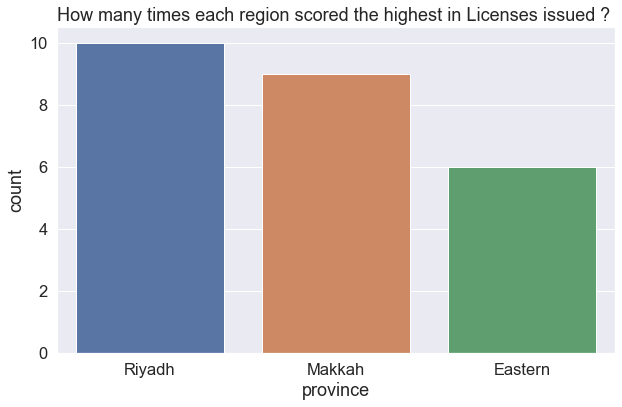

In [72]:
plt.figure(figsize=(10,6))
ax = sns.countplot(Rig_hig.province)
ax.set_title('How many times each region scored the highest in Licenses issued ? ')

<div class="alert alert-block alert-info">
In whole the 25 years from 1993-2017, we see that only Riyadh, Makkah and Eastern have ever been the toppest in issuing driving licenses. Riyadh has been the highest in driving licenses for 10 different years, while makkah in 9 years and Eastern in 8 years.

###### 1.Regions that have the lowest Driving Licenses

In [73]:
Rig_low = combined_datasets.sort_values(by='num_of_licenses_issued',ascending=True)[['year','province','num_of_licenses_issued']].drop_duplicates(subset='year').sort_values(by='year')
Rig_low

,year,province,num_of_licenses_issued
34,1993,Northern Boarder,1510
260,1994,Northern Boarder,1457
259,1995,Northern Boarder,1318
148,1996,Northern Boarder,1383
261,1997,Northern Boarder,1531
110,1998,Northern Boarder,2014
109,1999,Northern Boarder,2311
35,2000,Northern Boarder,2894
111,2001,Northern Boarder,2971
149,2002,Northern Boarder,2268


In [74]:
Rig_low.province.unique()

array(['Northern Boarder', 'Al-Baha', 'Tabouk', 'Najran'], dtype=object)

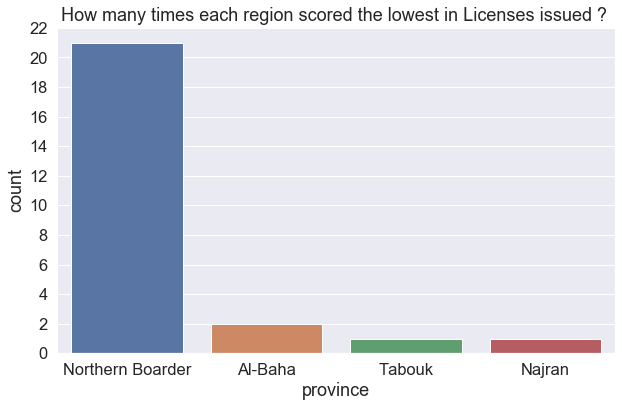

In [75]:
plt.figure(figsize=(10,6))
ax = sns.countplot(Rig_low.province)
ax.set_title('How many times each region scored the lowest in Licenses issued ? ')
ax.set_yticks(np.arange(0,24,2))

In [76]:
licen_mean = combined_datasets.groupby(by='province').mean().sort_values(by='num_of_licenses_issued',ascending=False)[['num_of_licenses_issued']].reset_index()
licen_mean.columns = ['province','mean_num_of_licenses_issued']
licen_mean

,province,mean_num_of_licenses_issued
0,Makkah,97346.36
1,Riyadh,89732.16
2,Eastern,85889.72
3,Qassim,22491.68
4,Asir,19624.60
5,Madinah,13963.36
6,Hail,10311.28
7,Jazan,8562.64
8,Tabouk,8153.96
9,Al-Jouf,6586.08


In [77]:
licen_mean.mean()

mean_num_of_licenses_issued    28915.347692
dtype: float64

<div class="alert alert-block alert-info">
In whole the 25 years from 1993-2017, we see that only Northern Boarder, Al-Baha, Tabouk and Najran have ever been the lowest in issuing driving licenses. Northern Boarder has been the lowest in driving licenses for 21 different years, while Al-Baha in 2 years, Tabouk and Najran both in 1 year.

<div class="alert alert-block alert-info">
One can notice the huge difference between the highest and lowest regions in driving licenses. This indicates the difference in the gowing rate of the number of drivers in each region (e.g. in 2017 the highest -Riyadh- has 495,307 driving licenses issued while the lowest Al-Baha issued only 4131 driving licenses which represnts only 0.83% of the number in Riyadh).

###### 2.Regions that have the highest Traffic Accidents

In [78]:
acci_highest = combined_datasets.sort_values(by='num_of_accidents',ascending=False)[['year','province',
                                        'num_of_accidents']].drop_duplicates(subset='year').sort_values(by='year')
acci_highest = acci_highest[acci_highest.year>2015]
acci_highest

,year,province,num_of_accidents
272,2016,Riyadh,141736.0
142,2017,Makkah,145541.0


###### 2.Regions that have the lowest Traffic Accidents

In [79]:
acci_lowest = combined_datasets.sort_values(by='num_of_accidents',ascending=True)[['year','province',
                                        'num_of_accidents']].drop_duplicates(subset='year').sort_values(by='year')
acci_lowest = acci_lowest[acci_lowest.year>2015]
acci_lowest

,year,province,num_of_accidents
119,2016,Najran,3235.0
285,2017,Al-Baha,1414.0


In [80]:
accid_mean = combined_datasets.groupby(by='province').mean().sort_values(by='num_of_accidents',ascending=False)[['num_of_accidents']].reset_index()
accid_mean.columns = ['province','mean_num_of_accidents']
accid_mean

,province,mean_num_of_accidents
0,Makkah,140189.5
1,Riyadh,120830.5
2,Eastern,91526.0
3,Asir,28964.5
4,Qassim,24034.5
5,Jazan,24017.0
6,Madinah,15272.5
7,Tabouk,13872.0
8,Northern Boarder,12368.0
9,Al-Jouf,10340.5


In [81]:
accid_mean.mean()

mean_num_of_accidents    38225.692308
dtype: float64

In [82]:
means_df = pd.merge(licen_mean,accid_mean, on='province')
means_df

,province,mean_num_of_licenses_issued,mean_num_of_accidents
0,Makkah,97346.36,140189.5
1,Riyadh,89732.16,120830.5
2,Eastern,85889.72,91526.0
3,Qassim,22491.68,24034.5
4,Asir,19624.60,28964.5
5,Madinah,13963.36,15272.5
6,Hail,10311.28,9789.0
7,Jazan,8562.64,24017.0
8,Tabouk,8153.96,13872.0
9,Al-Jouf,6586.08,10340.5


<div class="alert alert-block alert-info">
we see that the regions with the highest traffic accidents are Riyadh and Makkah for 2016 and 2017 respectively. We see from the plot of "Number of Traffic Accidents For Each Region" that the number of accidents in Riyadh has decreased significalntly from 2016 to 2017but the opposite happend in Makkah. you can observe also that in most regions the number of accidents decreased from 2016 to 2017. a possible reason for this reduction in accidents is the goverment imposition of a more strict policies and penalties as mentioned in (Saudi Gazette).

###### 3.Regions that have more Driving Licenses issued in each year than the year average.

In [83]:
licenses_mean_year = combined_datasets.groupby(by='year',as_index=False).mean()[['year','num_of_licenses_issued']]

In [84]:
licenses_mean_year.columns = ['year','year_mean']

In [85]:
lic = pd.merge(lic,licenses_mean_year,how='outer',on = 'year')
lic.head()

,year,province,num_of_licenses_issued,geo_coordinates,x_coordinate,y_coordinate,year_mean
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.263690,31631.076923
1,2012,Madinah,14459,"24.927534539, 39.4918237173",24.927535,39.491824,31631.076923
2,2012,Northern Boarder,3706,"30.197074783, 41.8171186952",30.197075,41.817119,31631.076923
3,2012,Eastern,129971,"23.2883307307, 50.1478302439",23.288331,50.147830,31631.076923
4,2012,Asir,23136,"19.1387847401, 42.941470036",19.138785,42.941470,31631.076923


In [86]:
lic_more_than_mean = lic[lic.num_of_licenses_issued > lic.year_mean][['year','province','num_of_licenses_issued','year_mean']]
lic_more_than_mean.sort_values(by=['year','num_of_licenses_issued'],ascending=False).head(10)

,year,province,num_of_licenses_issued,year_mean
206,2017,Riyadh,495307,71397.307692
200,2017,Makkah,142487,71397.307692
198,2017,Eastern,126816,71397.307692
283,2016,Riyadh,242851,53616.692308
280,2016,Eastern,142307,53616.692308
276,2016,Makkah,136055,53616.692308
279,2016,Hail,54507,53616.692308
159,2015,Makkah,157389,33495.307692
156,2015,Eastern,135752,33495.307692
157,2015,Asir,38567,33495.307692


In [87]:
lic_more_than_mean.province.value_counts()

Makkah     25
Eastern    21
Riyadh     21
Qassim      5
Asir        1
Hail        1
Name: province, dtype: int64

In [88]:
sorted(lic_more_than_mean[lic_more_than_mean['province']=='Riyadh']['year'].unique())

[1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2013,
 2014,
 2016,
 2017]

In [89]:
sorted(lic_more_than_mean[lic_more_than_mean['province']=='Eastern']['year'].unique())

[1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [90]:
sorted(lic_more_than_mean[lic_more_than_mean['province']=='Qassim']['year'].unique())

[1993, 1994, 1995, 1996, 2010]

In [91]:
sorted(lic_more_than_mean[lic_more_than_mean['province']=='Asir']['year'].unique())

[2015]

In [92]:
sorted(lic_more_than_mean[lic_more_than_mean['province']=='Hail']['year'].unique())

[2016]

<div class="alert alert-block alert-info">
Only Makkah province has number of driving licenses issued for all the 25 years more than the year average. Riyadh issued driving licenses less than the year mean in three years 2001,2011, 2012 and 2015. eastern province issued driving licenses less than the year mean also in four years 1993,1994, 1995 and 1996. Qassim issued driving licenses more than the year aerage  only in five years, 1993, 1994, 1995, 1996 and 2010. Both Asir and Hail issued driving licenses more than the year mean in only one year. Asir in 2015 and Hail in 2016. all the other 13 regions have never exceeded the year average.

###### 4.Regions that have moreTraffic Accidents happened in each year than the year average.

In [93]:
acci_year_mean = tra.groupby(by='year',as_index=False).mean()[['year','num_of_accidents']]
acci_year_mean.columns = ['year','year_accidents_mean']
acci_year_mean

,year,year_accidents_mean
0,2016,41029.230769
1,2017,35422.153846


In [94]:
tra = pd.merge(tra,acci_year_mean,how='outer',on='year')[['year','province','num_of_accidents','year_accidents_mean']]
tra

,year,province,num_of_accidents,year_accidents_mean
0,2016,Al-Baha,3618,41029.230769
1,2016,Al-Jouf,10212,41029.230769
2,2016,Asir,32684,41029.230769
3,2016,Eastern,101619,41029.230769
4,2016,Hail,10199,41029.230769
5,2016,Jazan,25873,41029.230769
6,2016,Madinah,14475,41029.230769
7,2016,Makkah,134838,41029.230769
8,2016,Najran,3235,41029.230769
9,2016,Northern Boarder,13196,41029.230769


In [95]:
acci_more_than_mean = tra[tra.num_of_accidents>tra.year_accidents_mean]
acci_more_than_mean.sort_values(by=['year','num_of_accidents'],ascending=False)

,year,province,num_of_accidents,year_accidents_mean
20,2017,Makkah,145541,35422.153846
24,2017,Riyadh,99925,35422.153846
16,2017,Eastern,81433,35422.153846
11,2016,Riyadh,141736,41029.230769
7,2016,Makkah,134838,41029.230769
3,2016,Eastern,101619,41029.230769


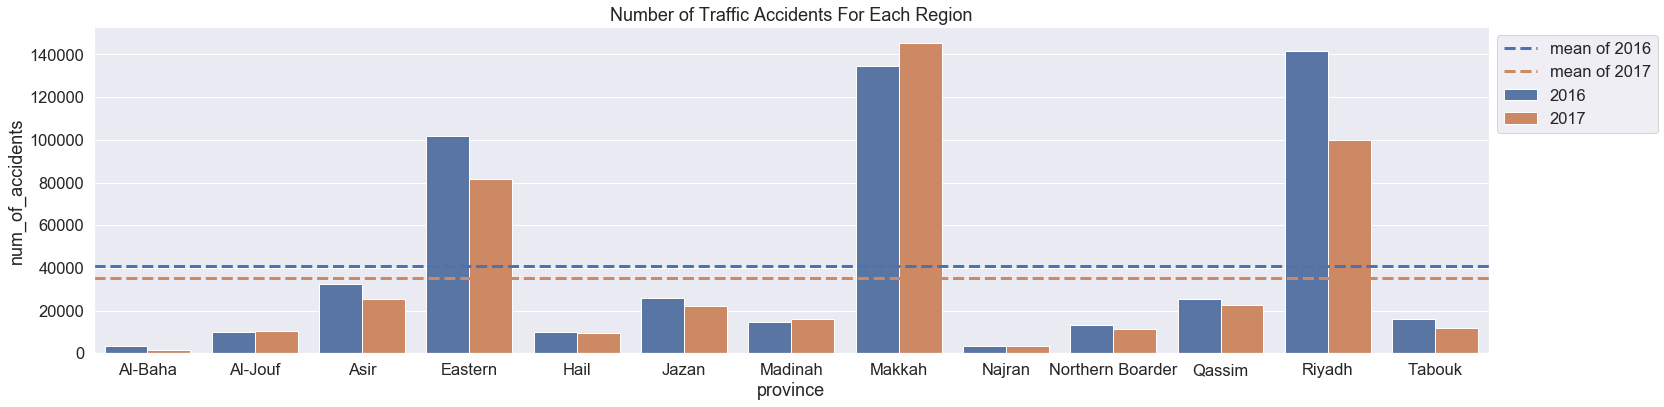

In [96]:
plt.figure(figsize=(25,6))
sns.barplot(data=tra, x='province',hue='year', y='num_of_accidents')
plt.axhline(y=41029.230769, linewidth=3, ls='dashed', label = 'mean of 2016')
plt.axhline(y=35422.153846, linewidth=3, ls='dashed', label = 'mean of 2017', c = '#cc8963')
plt.title('Number of Traffic Accidents For Each Region')
plt.legend(bbox_to_anchor=(1,1))

<div class="alert alert-block alert-info">
only three regions Riyadh, Makkah and Eastern has ever exceeded the year number of accidents mean. we can spculate that these three regions contribute the most in the number of traffic accidents.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [97]:
combined_datasets.columns

Index(['year', 'province', 'num_of_licenses_issued', 'num_of_accidents',
       'num_of_dead', 'num_of_injured', 'geo_coordinates', 'x_coordinate',
       'y_coordinate'],
      dtype='object')

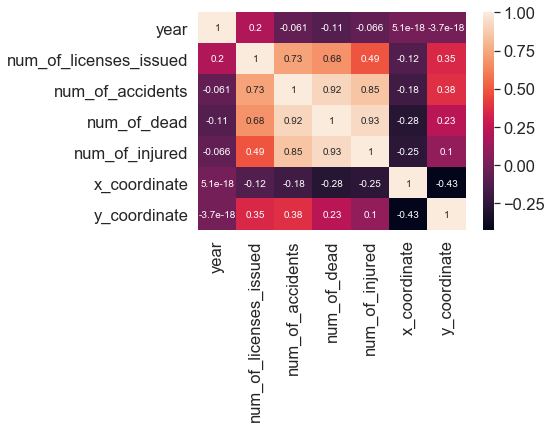

In [98]:
sns.heatmap(combined_datasets[['year', 'num_of_licenses_issued', 'num_of_accidents',
       'num_of_dead', 'num_of_injured', 'x_coordinate',
       'y_coordinate']].corr(), annot=True)

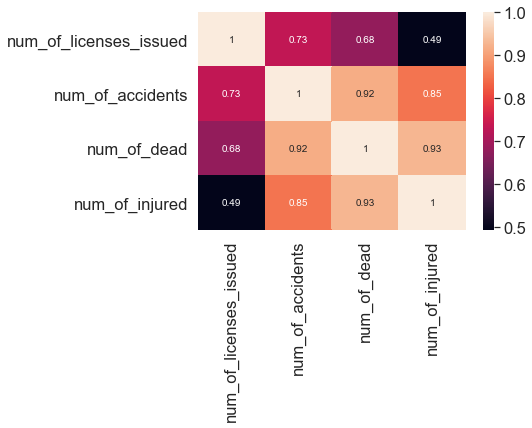

In [99]:
sns.heatmap(combined_datasets[['num_of_licenses_issued', 'num_of_accidents',
       'num_of_dead', 'num_of_injured']].corr(), annot=True)

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [100]:
sns.set_style('whitegrid')
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize = (12,12), nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        # Set titles, labels, etc here for each subplot


#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

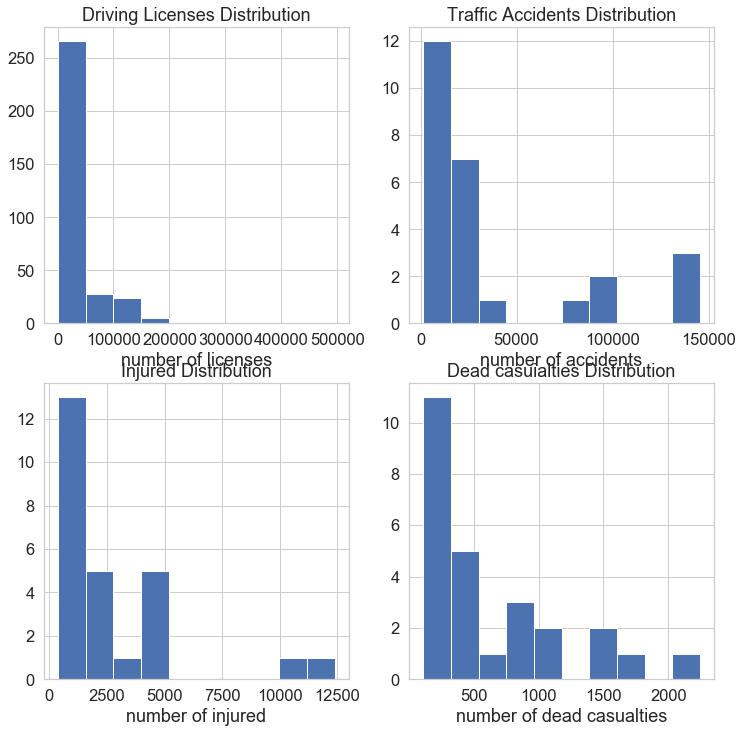

In [101]:
subplot_histograms(combined_datasets,['num_of_licenses_issued','num_of_accidents','num_of_injured','num_of_dead'],
                   ['Driving Licenses Distribution','Traffic Accidents Distribution','Injured Distribution','Dead casuialties Distribution'], 
                   ['number of licenses','number of accidents','number of injured','number of dead casualties'])
plt.tight_layout

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0.5, 1.0, 'Driving Licenses vs. Traffic Accidents for 2016')

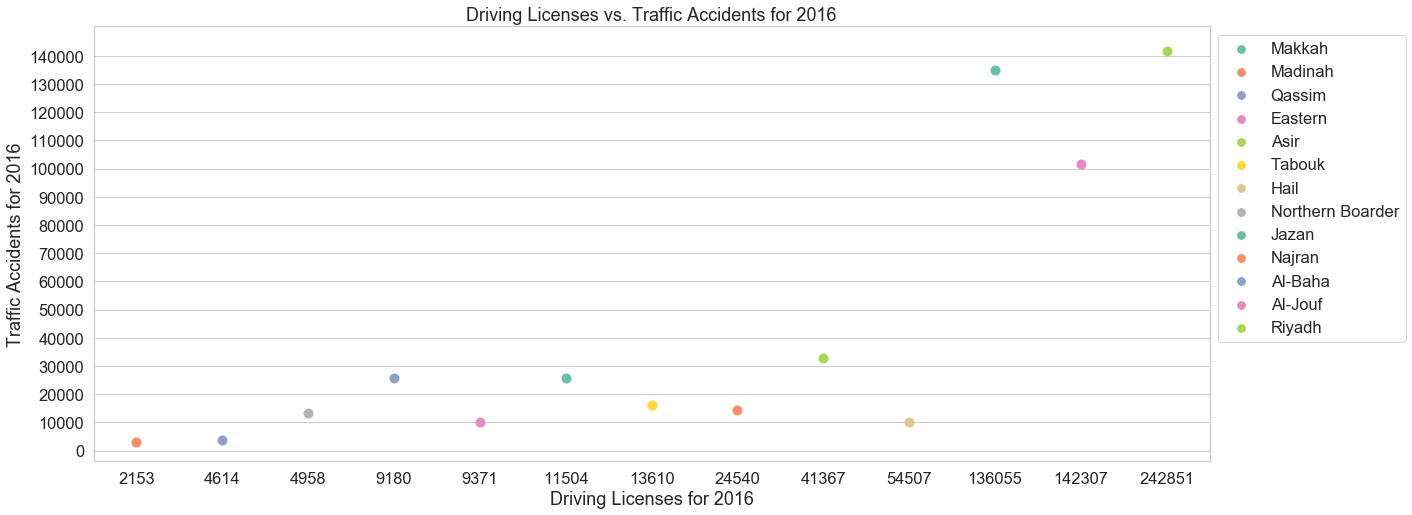

In [102]:
plt.figure(figsize=(20,8))
x=sns.swarmplot(combined_datasets.num_of_licenses_issued[combined_datasets.year==2016],combined_datasets.num_of_accidents[combined_datasets.year==2016], palette='Set2', s=10, hue='province',data=combined_datasets)
# x.set(yscale='log')
x.legend(bbox_to_anchor=(1, 1))
plt.yticks(np.arange(0,150000,10000))
plt.ylabel('Traffic Accidents for 2016')
plt.xlabel('Driving Licenses for 2016')
plt.title('Driving Licenses vs. Traffic Accidents for 2016')

Text(0.5, 1.0, 'Driving Licenses vs. Traffic Accidents for 2017')

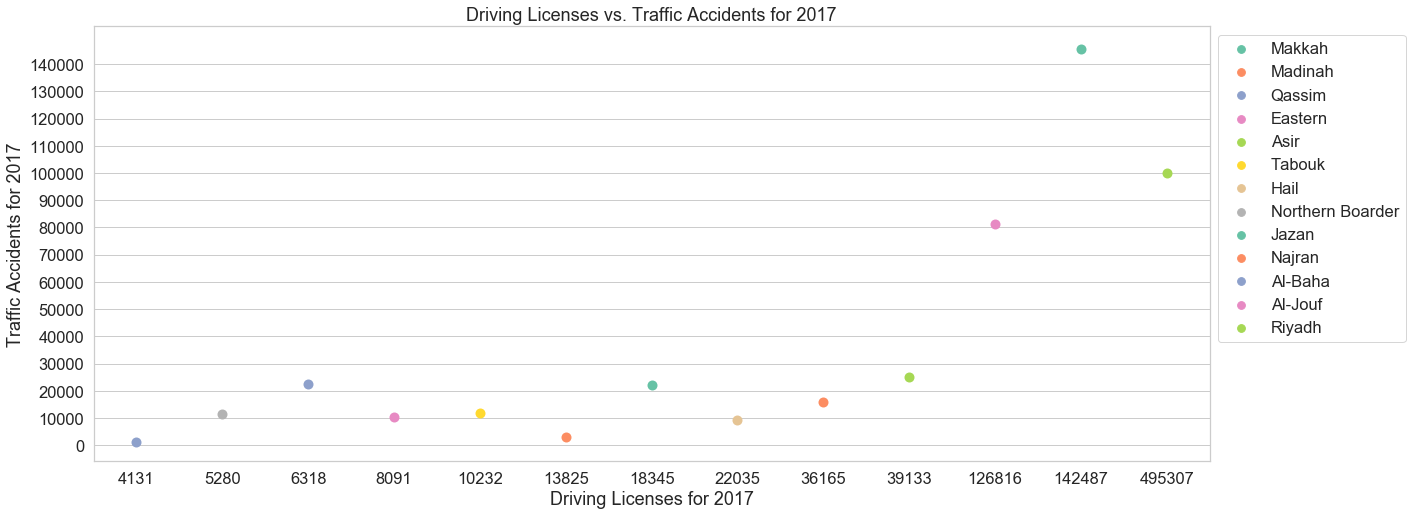

In [103]:
plt.figure(figsize=(20,8))
x=sns.swarmplot(combined_datasets.num_of_licenses_issued[combined_datasets.year==2017],combined_datasets.num_of_accidents[combined_datasets.year==2017], palette='Set2', s=10, hue='province',data=combined_datasets)
# x.set(yscale='log')
x.legend(bbox_to_anchor=(1, 1))
plt.yticks(np.arange(0,150000,10000))
plt.ylabel('Traffic Accidents for 2017')
plt.xlabel('Driving Licenses for 2017')
plt.title('Driving Licenses vs. Traffic Accidents for 2017')

Text(0.5, 1.0, 'Traffic Accidents 2017 vs. Traffic Accidents for 2016')

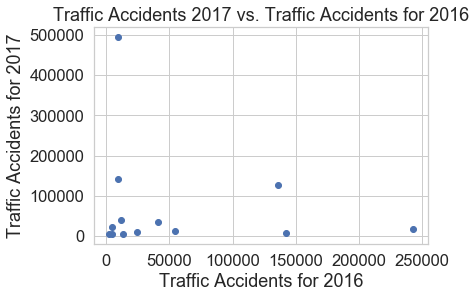

In [104]:
plt.scatter(combined_datasets.num_of_licenses_issued[combined_datasets.year==2016],
            combined_datasets.num_of_licenses_issued[combined_datasets.year==2017])
plt.ylabel('Traffic Accidents for 2017')
plt.xlabel('Traffic Accidents for 2016')
plt.title('Traffic Accidents 2017 vs. Traffic Accidents for 2016')

Text(0.5, 1.0, 'Driving Licenses 2017 vs. Driving Licenses 2016')

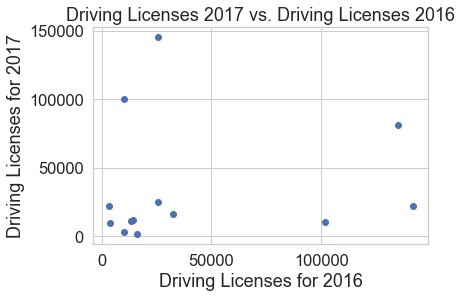

In [105]:
plt.scatter(combined_datasets.num_of_accidents[combined_datasets.year==2016],
            combined_datasets.num_of_accidents[combined_datasets.year==2017])
plt.ylabel('Driving Licenses for 2017')
plt.xlabel('Driving Licenses for 2016')
plt.title('Driving Licenses 2017 vs. Driving Licenses 2016')

In [106]:
x = combined_datasets[combined_datasets.year == 2017].num_of_accidents
y = combined_datasets.num_of_accidents[combined_datasets.year==2016]
x

27       9379.0
32      11540.0
80      22405.0
88      81433.0
95      11713.0
142    145541.0
206      3193.0
215     10469.0
226     16070.0
242     25245.0
264     22161.0
271     99925.0
285      1414.0
Name: num_of_accidents, dtype: float64

In [107]:
y

50       3618.0
107     13196.0
119      3235.0
143    134838.0
170     14475.0
174     25664.0
196     10199.0
235    101619.0
243     32684.0
265     25873.0
272    141736.0
289     10212.0
317     16031.0
Name: num_of_accidents, dtype: float64

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [109]:
sns.set_style('whitegrid')

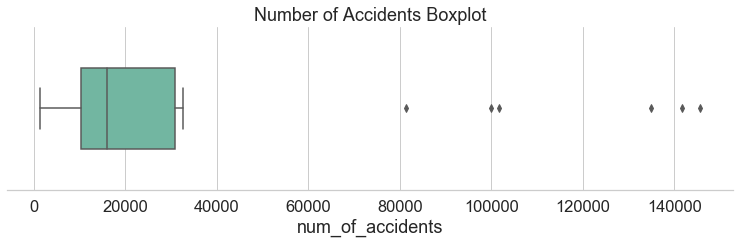

In [110]:
# Code
plt.figure(figsize=(13,3))
sns.boxplot(combined_datasets.num_of_accidents,palette='Set2',width = 0.5)
plt.title('Number of Accidents Boxplot')
sns.despine(left=True)

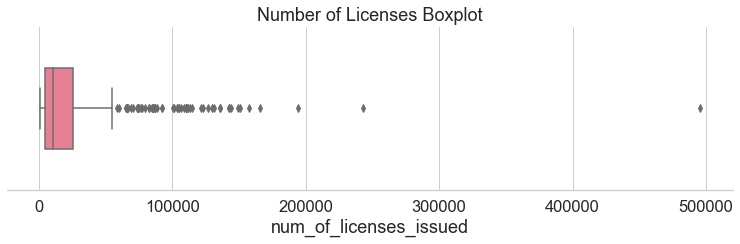

In [111]:
plt.figure(figsize=(13,3))
sns.boxplot(combined_datasets.num_of_licenses_issued,palette='husl',width=0.5)
plt.title('Number of Licenses Boxplot')
sns.despine(left=True)

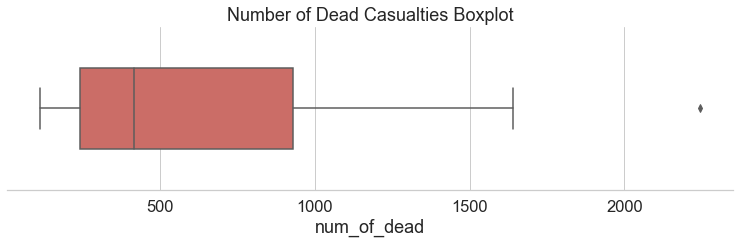

In [112]:
plt.figure(figsize=(13,3))
sns.boxplot(combined_datasets.num_of_dead,palette='hls',width=0.5)
plt.title('Number of Dead Casualties Boxplot')
sns.despine(left=True)

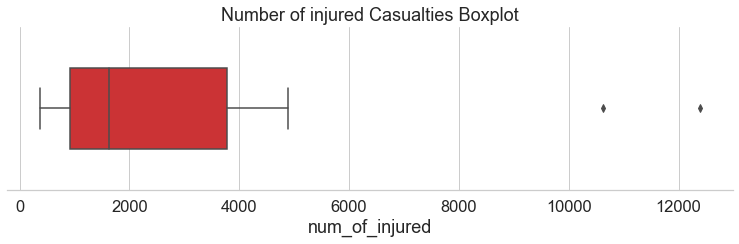

In [113]:
plt.figure(figsize=(13,3))
sns.boxplot(combined_datasets.num_of_injured,palette='Set1',width=0.5)
plt.title('Number of injured Casualties Boxplot')
sns.despine(left=True)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

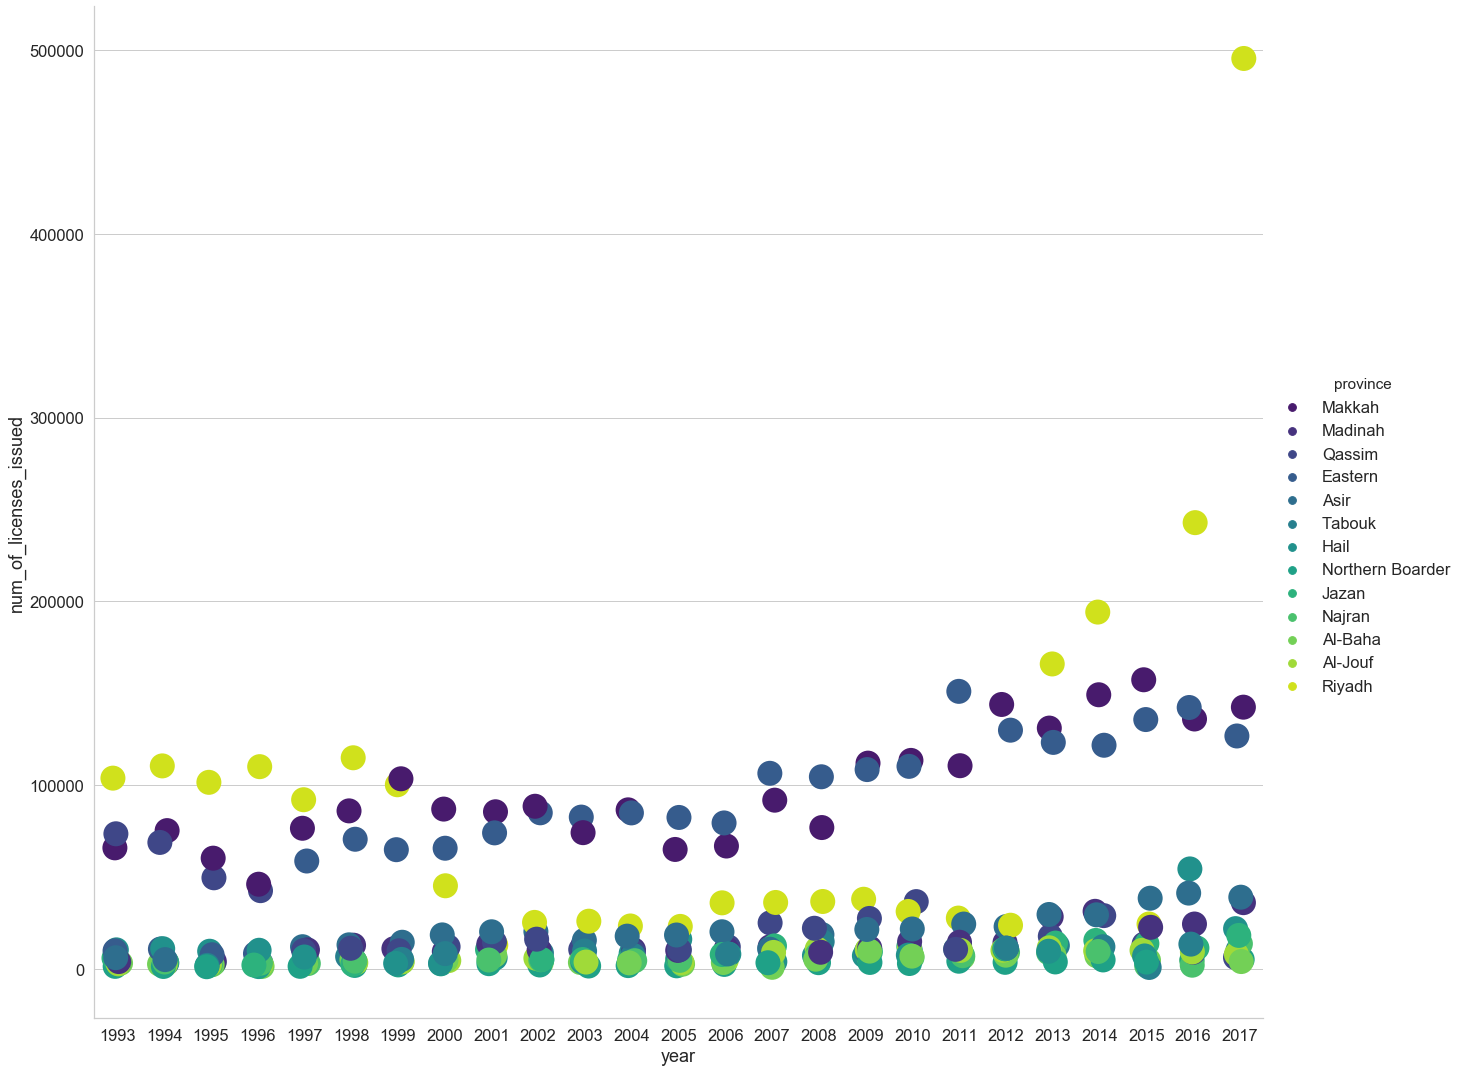

In [114]:
# sns.barplot(combined_datasets.province,combined_datasets.num_of_licenses_issued)
# plt.figure(figsize=(15,20))
x = sns.catplot(x="year", y="num_of_licenses_issued", hue='province', data=combined_datasets, height=15, aspect=1.2,palette="viridis",s=25, edgecolor="1",jitter=True)


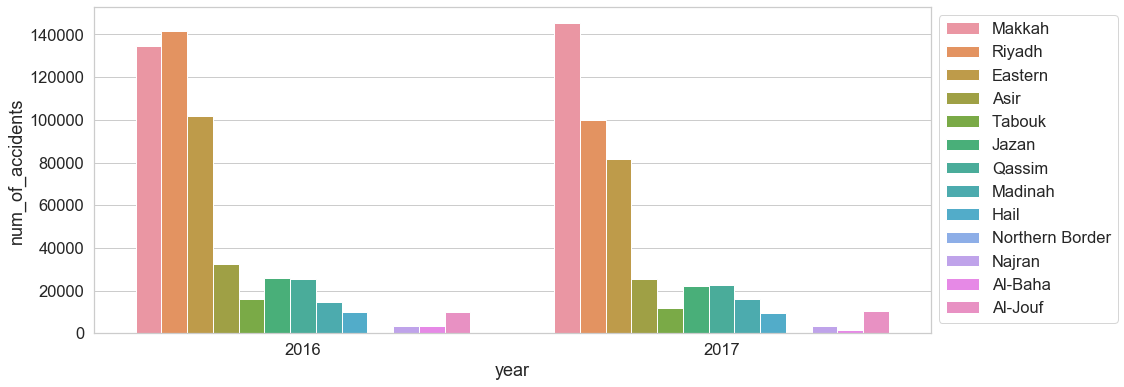

In [115]:
plt.figure(figsize=(15,6))
x=sns.barplot(x=combined_datasets[combined_datasets['year']>2015]['year'],y='num_of_accidents', hue='province',hue_order=['Makkah','Riyadh','Eastern','Asir','Tabouk','Jazan','Qassim','Madinah','Hail','Northern Border','Najran','Al-Baha','Al-Jouf'], data=combined_datasets)
x.legend(bbox_to_anchor=(1, 1))

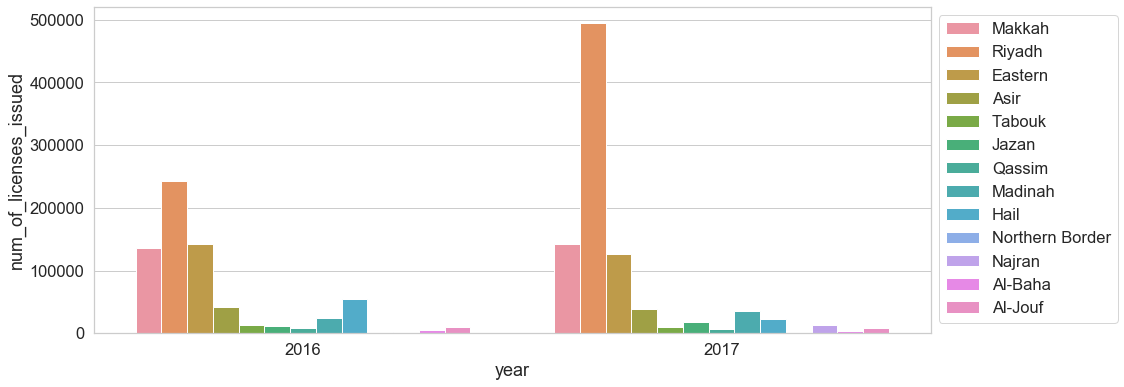

In [116]:
plt.figure(figsize=(15,6))
x=sns.barplot(x=combined_datasets[combined_datasets['year']>2015]['year'],y='num_of_licenses_issued', hue='province',hue_order=['Makkah','Riyadh','Eastern','Asir','Tabouk','Jazan','Qassim','Madinah','Hail','Northern Border','Najran','Al-Baha','Al-Jouf'], data=combined_datasets)
x.legend(bbox_to_anchor=(1, 1))

the number of accidents in Riyadh has decreased from more than 140,000 accidents in 2016 to 100,000 accidents in 2017 despite the fact that the number of issued driving license in Riyadh has surge increase in 2017.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [117]:
cds_num = combined_datasets[['year','num_of_licenses_issued','num_of_accidents','num_of_dead','num_of_injured','x_coordinate','y_coordinate']]
cds_num.head() 
# cds_num == combined_datasets numerical columns

,year,num_of_licenses_issued,num_of_accidents,num_of_dead,num_of_injured,x_coordinate,y_coordinate
0,2012,143954,NaN,NaN,NaN,21.628963,41.26369
1,1994,75349,NaN,NaN,NaN,21.628963,41.26369
2,1998,86082,NaN,NaN,NaN,21.628963,41.26369
3,2004,86636,NaN,NaN,NaN,21.628963,41.26369
4,2005,65099,NaN,NaN,NaN,21.628963,41.26369


In [118]:
cds_num.mean()

year                       2005.000000
num_of_licenses_issued    28915.347692
num_of_accidents          38225.692308
num_of_dead                 635.384615
num_of_injured             2743.038462
x_coordinate                 23.810447
y_coordinate                 42.602789
dtype: float64

In [119]:
cds_num.skew()

year                      0.000000
num_of_licenses_issued    4.177206
num_of_accidents          1.486476
num_of_dead               1.406080
num_of_injured            2.302753
x_coordinate              0.020839
y_coordinate              0.714937
dtype: float64

In [120]:
cds_num.std()

year                          7.222222
num_of_licenses_issued    47419.058819
num_of_accidents          46493.705035
num_of_dead                 549.783381
num_of_injured             2922.641127
x_coordinate                  4.197987
y_coordinate                  3.254196
dtype: float64

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

<div class="alert alert-block alert-success">
Answer:
From the histograms above we can see that none of the variables data are normally distributed. However just to ensure that they are relly not normally distributed, we will use two normality test techniques, one is graphical (Q-Q plot) and the other is statistical (D'Agostino's Test).

The graphical test: Q-Q plots

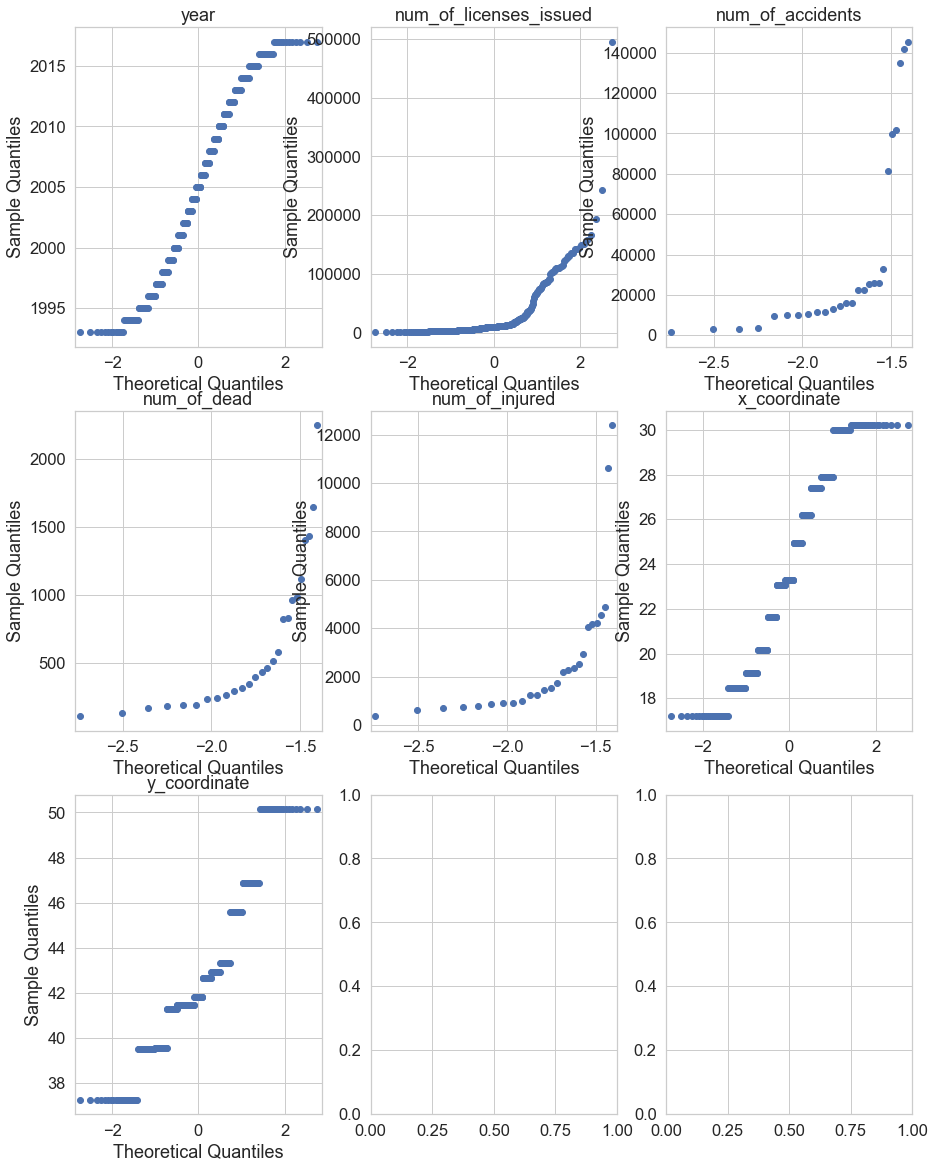

In [121]:
fig,ax = plt.subplots(3,3, figsize=(15,20))
ax = ax.ravel()
for i, column in enumerate(cds_num):
    qqplot(cds_num[column], ax = ax[i])
    ax[i].set_title(column)
    plt.tight_layout


<div class="alert alert-block alert-success">
Answer: we can see from the Q-Q plots, that none of the features follow a linear trend. Thus, none of them is normally distributed.

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

FOR THIS CASE WE WILL USE HYPOTHESIS TEST:
H0: the data is normally distributed.
H1: data is not normally distributed.

In [122]:
for i in cds_num:
    stat,p = normaltest(cds_num[i].dropna())
    print('\033[1m' + i)
    print(f'(stat = {stat} , p-value = {p})')
    if p > 0.05:
        print('Since the p-value is greater than 0.05 the data can be considered as normally distributed (fail to reject the null hypothesis)')
    else:
        print(f'Since the p-value is less than 0.05 the data can not be considered as normally distributed (the {i} data is not normal), (reject the null hypothesis)')
    print('\n \n')


year
(stat = 185.92884957832038 , p-value = 4.227302249806226e-41)
Since the p-value is less than 0.05 the data can not be considered as normally distributed (the year data is not normal), (reject the null hypothesis)

 

num_of_licenses_issued
(stat = 325.6344141041676 , p-value = 1.9470872744852377e-71)
Since the p-value is less than 0.05 the data can not be considered as normally distributed (the num_of_licenses_issued data is not normal), (reject the null hypothesis)

 

num_of_accidents
(stat = 9.604128228241274 , p-value = 0.008212777431565399)
Since the p-value is less than 0.05 the data can not be considered as normally distributed (the num_of_accidents data is not normal), (reject the null hypothesis)

 

num_of_dead
(stat = 10.46975906389935 , p-value = 0.005327466234634836)
Since the p-value is less than 0.05 the data can not be considered as normally distributed (the num_of_dead data is not normal), (reject the null hypothesis)

 

num_of_injured
(stat = 25.490999951788233 

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [123]:
# Code

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

<div class="alert alert-block alert-warning">
We have seen in the _Number of Traffic Accidents For Each Region_ barplot that only three regions have ever crossed the year traffic accidents mean. These regions (Riyadh, Makkah and Eastern) contributes the most to the number of traffic accidents in KSA. Around 71% of the traffic accidents that happened in Saudi Arabia During 2016 and 2017 were in Makkah, Riyadh or Eastern Region. In addition, the same three region in at least 21 years have exceeded the year number of Driving Licenses issued.  Therefore, I find it appropriate to study these three regions in particular. I will add also the updated Traffic Accidents dataset and Driving Licenses dataset that includes the year 2018 (data source: King Abdullah Petroleum studies and Research Center 'KAPSARC' https://datasource.kapsarc.org).


In [124]:
combined_datasets2018 = pd.read_csv("..\data\combined_datasets2018only.csv")

In [125]:
del combined_datasets2018['Unnamed: 0']

In [126]:
combined_datasets2018.head()

,year,province,num_of_licenses_issued,num_of_accidents,num_of_dead,num_of_injured,geo_coordinates,x_coordinate,y_coordinate
0,2018,Madinah,23335,20547,483,2666,"24.927534539,39.4918237173",24.927535,39.491824
1,2018,Asir,22362,25964,696,2192,"19.1387847401,42.941470036",19.138785,42.941470
2,2018,Al-Jouf,6834,7355,157,618,"29.9677445762,39.5570371172",29.967745,39.557037
3,2018,Tabouk,7613,10034,293,977,"27.90165499,37.2598581394",27.901655,37.259858
4,2018,Al-Baha,2575,1764,111,935,"20.1484058503,41.4665484892",20.148406,41.466548


In [127]:
combined_datasets2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
year                      13 non-null int64
province                  13 non-null object
num_of_licenses_issued    13 non-null int64
num_of_accidents          13 non-null int64
num_of_dead               13 non-null int64
num_of_injured            13 non-null int64
geo_coordinates           13 non-null object
x_coordinate              13 non-null float64
y_coordinate              13 non-null float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1016.0+ bytes


In [128]:
combined_datasets = pd.concat([combined_datasets2018,combined_datasets])

In [129]:
combined_datasets[combined_datasets.year == 2018].num_of_accidents.mean()

27112.615384615383

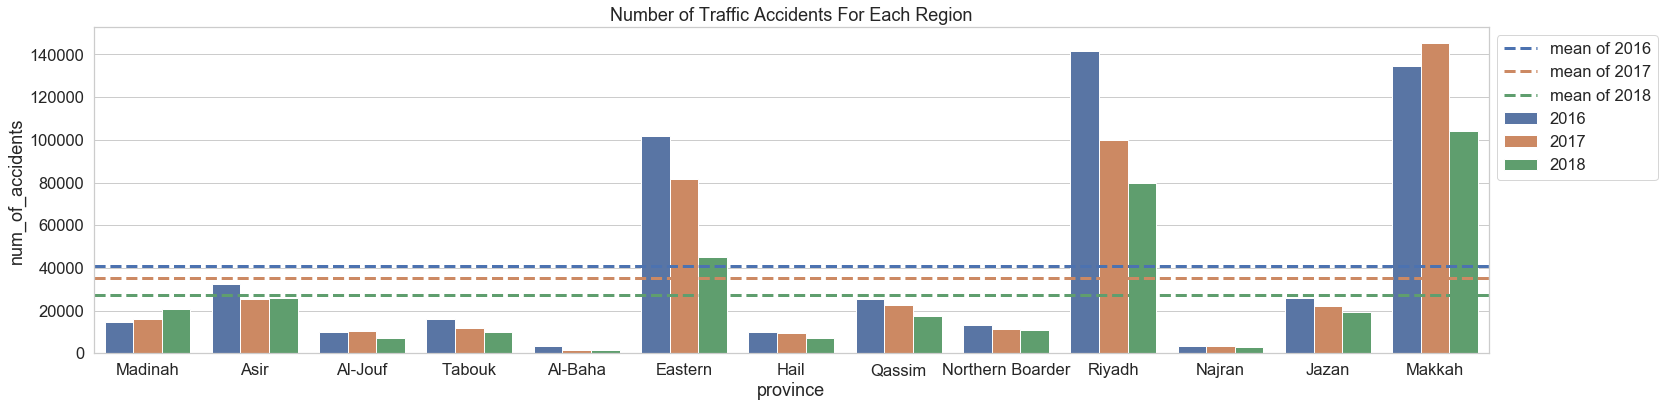

In [130]:
plt.figure(figsize=(25,6))
sns.barplot(data=combined_datasets[combined_datasets.year >2015], x='province',hue='year', y='num_of_accidents')
plt.axhline(y=41029.230769, linewidth=3, ls='dashed', label = 'mean of 2016')
plt.axhline(y=35422.153846, linewidth=3, ls='dashed', label = 'mean of 2017', c = '#cc8963')
plt.axhline(y=27112.615384615383, linewidth=3, ls='dashed', label = 'mean of 2018', c = '#5f9e6e')
plt.title('Number of Traffic Accidents For Each Region')
plt.legend(bbox_to_anchor=(1,1))

In [131]:
combined_datasets[combined_datasets.year == 2018].num_of_licenses_issued.mean()

69218.76923076923

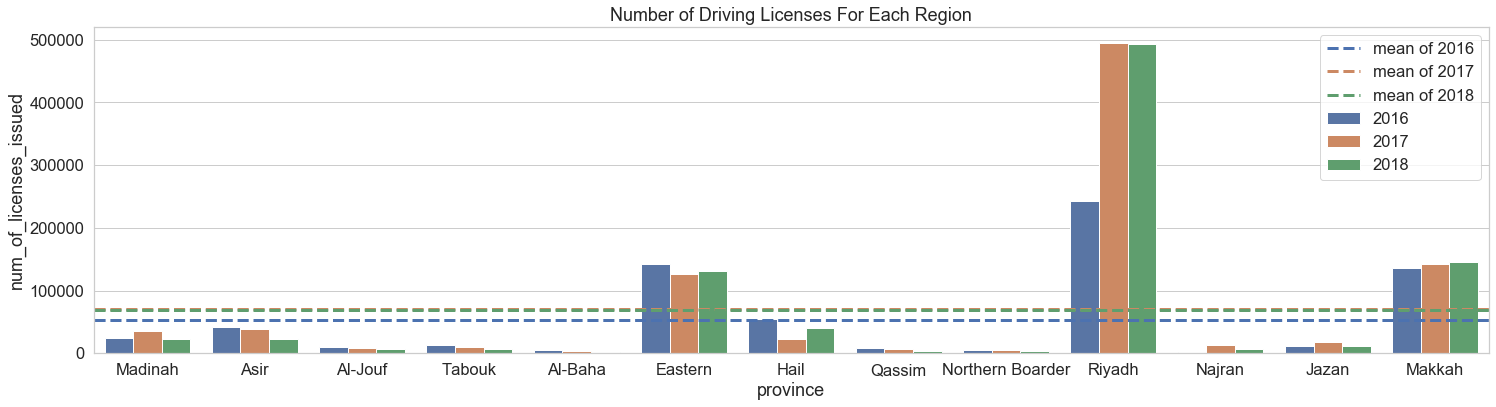

In [142]:
plt.figure(figsize=(25,6))
x = sns.barplot(data=combined_datasets[combined_datasets.year>2015], x='province',hue='year', y='num_of_licenses_issued')
plt.axhline(y=53616.692307692305, linewidth=3, ls='dashed', label = 'mean of 2016')
plt.axhline(y=71397.30769230769, linewidth=3, ls='dashed', label = 'mean of 2017', c = '#cc8963')
plt.axhline(y=69218.76923076923, linewidth=3, ls='dashed', label = 'mean of 2018', c = '#5f9e6e')
plt.title('Number of Driving Licenses For Each Region')
plt.legend(bbox_to_anchor=(1,1))


In [135]:
combined_datasets2018.num_of_injured[combined_datasets2018.year == 2018].sum()
# total number of traffic accidents in saudi arabia in 2018

30217

<div class="alert alert-block alert-info">
It is obvious that the traffic accidents in Saudi Arabia are decreasing with time (notice the decrease in the accidents mean between 2016 to 2018). This decrease is highly because of the high decrease in the three main regions (Riyadh, Makkah and Eastern). Despite the fact that Driving Licenses issued generally is increaseing, the number of accidents decreased. 

## Referances
- “New Traffic Laws in 15 Days.” Saudigazette, 3 Oct. 2016, http://live.saudigazette.com.sa/article/164574/New-traffic-laws-in-15-days.

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

<div class="alert alert-block alert-info">
- In KSA, the number of accidents is decreasing over time. the mean number of accidents has decreased by 51.32% from 2016 to 2018, which is a huge difference. This decrease is the result of the strict implementation of traffic laws and regulations including increasing the traffic violation tickets and Saher system. All these efforts are made to regulate the driver behaviour. In my opinion, the lack of data about the traffic accidents in the kingdom minmize the ability to exctract trends or more insights from the data. 